In [1]:
from qiskit import *
%matplotlib inline
import numpy as np
from qiskit.visualization import plot_histogram

In [2]:
n = 2 #Number of qubits

qr1 = QuantumRegister(size=n)
qr2 = QuantumRegister(size=1)
cr = ClassicalRegister(size=n)

In [3]:
def function(circuit,fn):
    if fn == 'const-0':
        circuit.x(qr2)
        circuit.barrier()
        circuit.h(qr1)
        circuit.h(qr2)
        circuit.barrier()
        circuit.barrier()
        circuit.h(qr1)
        circuit.barrier()
        circuit.measure(qr1,cr)
    elif fn == 'const-1':
        circuit.x(qr2)
        circuit.barrier()
        circuit.h(qr1)
        circuit.h(qr2)
        circuit.barrier()
        circuit.x(qr1)
        circuit.barrier()
        circuit.h(qr1)
        circuit.barrier()
        circuit.measure(qr1,cr)
    elif fn == 'balanced':
        circuit.x(qr2)
        circuit.barrier()
        circuit.h(qr1)
        circuit.h(qr2)
        circuit.barrier()
        circuit.cx(qr1[0],qr2)
        circuit.barrier()
        circuit.h(qr1)
        circuit.barrier()
        circuit.measure(qr1,cr)
    return circuit

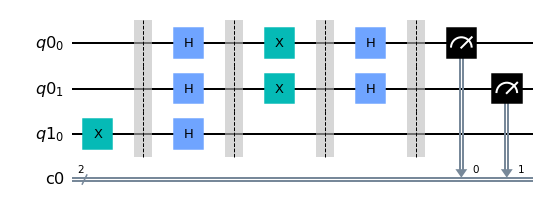

In [4]:
circuit_1 = QuantumCircuit(qr1,qr2,cr)

circuit_1 = function(circuit_1,'const-1')
circuit_1.draw(output='mpl')

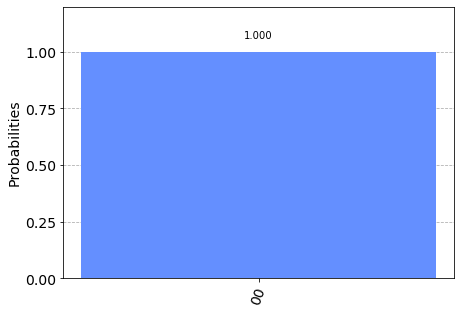

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit_1,backend=simulator).result()
plot_histogram(result.get_counts())

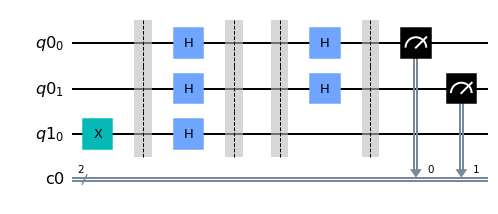

In [6]:
circuit_0 = QuantumCircuit(qr1,qr2,cr)

circuit_0 = function(circuit_0,'const-0')
circuit_0.draw(output='mpl')

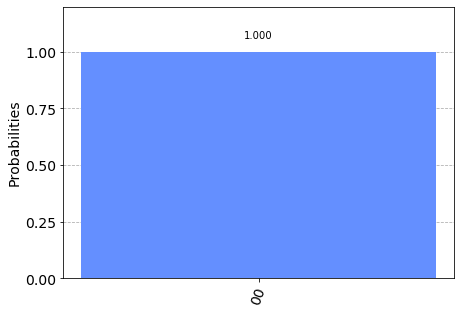

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit_0,backend=simulator).result()
plot_histogram(result.get_counts())

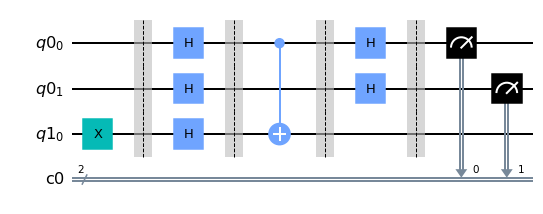

In [8]:
circuit_b = QuantumCircuit(qr1,qr2,cr)

circuit_b = function(circuit_b,'balanced')
circuit_b.draw(output='mpl')

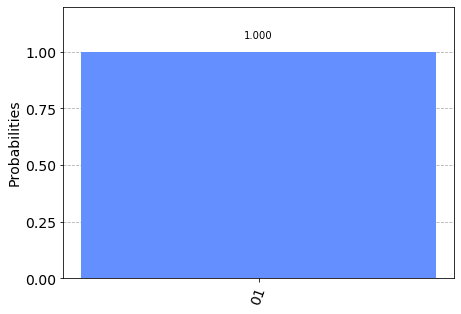

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit_b,backend=simulator).result()
plot_histogram(result.get_counts())